#### Non - Linear Models  - Polynomial Regression
Linear Data - That there should be some linearity in the variables compare to target.
In Data Modelling  - Independent/ Dependent Variables
Independent Variables and tranform that into Polymial Features
Changing the degree of the Independent Variables

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'Temp':[0,20,40,60,80,100], 'Pressure':[0.0002,0.0012,0.012,0.0900,0.12,0.27]})
df

,Temp,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0120
3,60,0.0900
4,80,0.1200
5,100,0.2700


In [3]:
X = df.iloc[:,0:1].values
y = df.iloc[:,1].values

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lin = LinearRegression()

In [8]:
lin.fit(X,y)

LinearRegression()

In [9]:
import matplotlib.pyplot as plt

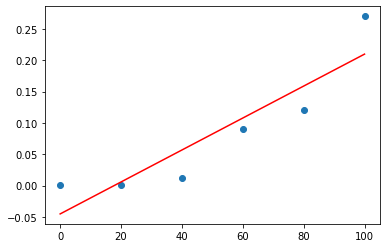

In [12]:
plt.scatter(X,y)
plt.plot(X,lin.predict(X),color = 'red')

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly = PolynomialFeatures(degree = 3)

In [18]:
X_poly = poly.fit_transform(X)
X_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [19]:
lin.fit(X_poly,y)

LinearRegression()

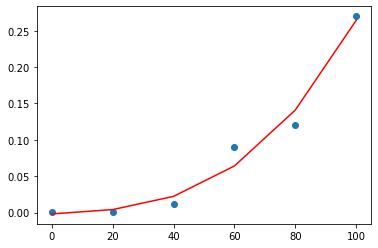

In [20]:
plt.scatter(X,y)
plt.plot(X,lin.predict(X_poly),color = 'red')

In [1]:
#### Data File Named as Students.Csv
import pandas as pd

In [2]:
df = pd.read_csv("Students.csv")

In [3]:
df.head()

,JEEPRE,JEEMAINS,STATUS
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df['STATUS'].value_counts()  ### Balanced and Imbalanced Classes

1    60
0    40
Name: STATUS, dtype: int64

In [5]:
df.shape

(100, 3)

In [6]:
df = df.sample(frac=1)

In [7]:
df.head()

,JEEPRE,JEEMAINS,STATUS
36,33.915500,98.869436,0
46,77.193035,70.458200,1
0,34.623660,78.024693,0
77,50.458160,75.809860,1
6,61.106665,96.511426,1


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train,test = train_test_split(df,test_size= 0.3, random_state= 1234)

In [10]:
train.shape

(70, 3)

In [11]:
train['STATUS'].value_counts()

1    42
0    28
Name: STATUS, dtype: int64

In [12]:
y_train = train['STATUS']
X_train = train[['JEEPRE','JEEMAINS']]

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lc = LogisticRegression()

In [15]:
model = lc.fit(X_train,y_train)

In [16]:
model.coef_

array([[0.19164684, 0.1957204 ]])

In [17]:
model.score(X_train,y_train)

0.9142857142857143

In [18]:
X_test = test[['JEEPRE','JEEMAINS']]
y_test = test['STATUS']

In [19]:
pred = model.predict(X_test)
pred

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [20]:
actual_pred = model.predict(df[['JEEPRE','JEEMAINS']])

In [21]:
actual_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [30]:
s = pd.Series(actual_pred)

In [31]:
df1 = pd.concat([df,s],axis = 1)
df1.to_csv("E://Predicted Students Ouput.csv")

,JEEPRE,JEEMAINS,STATUS,0
0,34.623660,78.024693,0,0
1,30.286711,43.894998,0,0
2,35.847409,72.902198,0,1
3,60.182599,86.308552,1,0
4,79.032736,75.344376,1,1
...,...,...,...,...
95,83.489163,48.380286,1,1
96,42.261701,87.103851,1,0
97,99.315009,68.775409,1,0
98,55.340018,64.931938,1,0


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
1 - accuracy_score(y_test,pred)

0.1333333333333333

<AxesSubplot:>

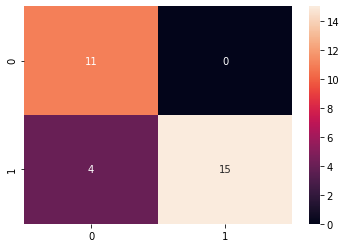

In [26]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,pred),annot = True)

In [ ]:
2 - Projects End to End Completetion

1. Bitcoin Price Prediction Project - Do Data Prep,Exploration(visual) Data Modelling, Inference, Visualisation of That Model Output
2. A Particular telecom - customer churn (Explore)

C:\Users\PROYAS BOSE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JEEMAINS'>

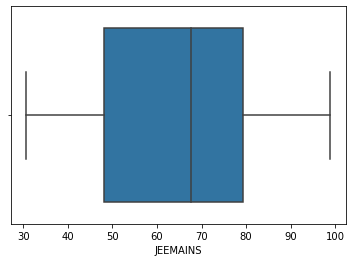

In [33]:
sns.boxplot(df['JEEMAINS'])

In [34]:
df.JEEPRE.skew()

-0.09556530744039231

In [35]:
df.JEEMAINS.skew()

0.06500698697595726

In [36]:
df.JEEPRE.kurt()

-0.9774442563187158